In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from functions.Environment import Environment
from functions.Particles import Particles
from functions.Simulators import Simulators
from functions.DataProcesser import DataProcesser as dp

C:\Users\gillw\AppData\Local\Temp\ipykernel_21248\2439520388.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  suck_zone = np.array([env.suck_zone_radius, env.ac_suck_hole_dot, (-np.pi/2, np.pi/2)])


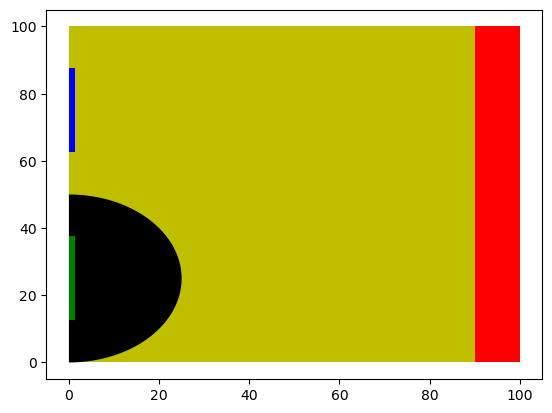

In [2]:
env = Environment(room_size=[0,100,0,100], heat_zone_size=[90,100,0,100])
suck_zone = np.array([env.suck_zone_radius, env.ac_suck_hole_dot, (-np.pi/2, np.pi/2)])
zones = [env.room_size, env.ac_blow_hole, suck_zone, env.ac_suck_hole, env.heat_zone]
color = ['y', 'b', 'k', 'g', 'r']
dp.plot_multi_zones(zones, color)

In [3]:
# # Test function: This code can work, comment out for now 
# # 假設你的陣列是這樣：
# box = np.array([0, 1, 0, 1])

# # 創建一個新的圖像
# plt.figure()

# # 繪製正方形
# x = [box[0], box[1], box[1], box[0]]
# y = [box[2], box[2], box[3], box[3]]
# plt.fill(x, y, 'b')  # 'b' 是藍色，你可以選擇你喜歡的顏色
# for i in range(len(x)):
#     plt.plot(x[i], y[i], 'o')
#     plt.text(x[i], y[i], f'({x[i]}, {y[i]})')

# # 顯示圖像
# plt.show()

C:\Users\gillw\AppData\Local\Temp\ipykernel_21248\124679439.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  box3 = np.array([np.array([0,1]),1,(-np.pi/2, np.pi/2)])


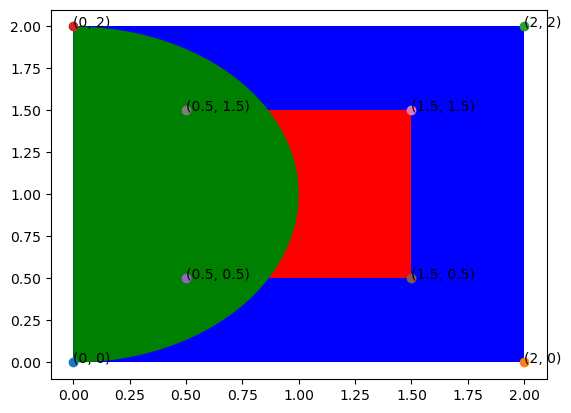

In [4]:
# Test function: This code can work, comment out for now 
# 假設你的陣列是這樣：
box1 = np.array([0, 2, 0, 2])
box2 = np.array([0.5, 1.5, 0.5, 1.5])
box3 = np.array([np.array([0,1]),1,(-np.pi/2, np.pi/2)])
box_all = [box1, box2, box3]
color = ['b', 'r', 'g']
# 創建一個新的圖像
plt.figure()

# 繪製正方形
for n,box in enumerate(box_all):
    if len(box) == 4:
        x = [box[0], box[1], box[1], box[0]]
        y = [box[2], box[2], box[3], box[3]]
        plt.fill(x, y, color[n])  
        for i in range(len(x)):
            plt.plot(x[i], y[i], 'o')
            plt.text(x[i], y[i], f'({x[i]}, {y[i]})')
    elif len(box) == 3:
        theta = np.linspace(box[2][0], box[2][1], 100)
        x = box[0][0] + box[1] * np.cos(theta)
        y = box[0][1] + box[1] * np.sin(theta)
        plt.fill(x, y, color[n])

# 顯示圖像
plt.show()

In [5]:
L = np.array([1,2,3,4,5])
print(len(L))

5
